<a href="https://colab.research.google.com/github/haidoro/Titanic/blob/analysis/Titanic_%E8%A7%A3%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic分類

#### 説明変数

- PassengerID:　乗客ID
- Survived: 　　生存結果 (0: 死亡,1: 生存,)　
- Pclass: 　　　乗客の階級 1が一番位が高いそう
- Name: 　　 　乗客の名前
- Sex: 　　　　 性別 女：0　男：1
- Age: 　　　　 年齢
- SibSp 　　 　 兄弟、配偶者の数。
- Parch 　　　　両親、子供の数。
- Ticket 　　　 チケット番号。
- Fare 　　　　 乗船料金。
- Cabin 　　　　部屋番号
- Embarked 　　 乗船した港　Cherbourg、Queenstown、Southamptonの３種類があります


In [0]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

# 機械学習ライブラリ
import sklearn


# 小数第3位まで表示
%precision 3

'%.3f'

In [0]:
# インポート
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Titanicデータを読み込み
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


欠損値の確認

In [0]:
print('Train欠損値\n',train.isnull().sum(),len(train))
print('-------------------------------------------')
print('Test欠損値\n',test.isnull().sum(),len(train))

Train欠損値
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 891
-------------------------------------------
Test欠損値
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 891


In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


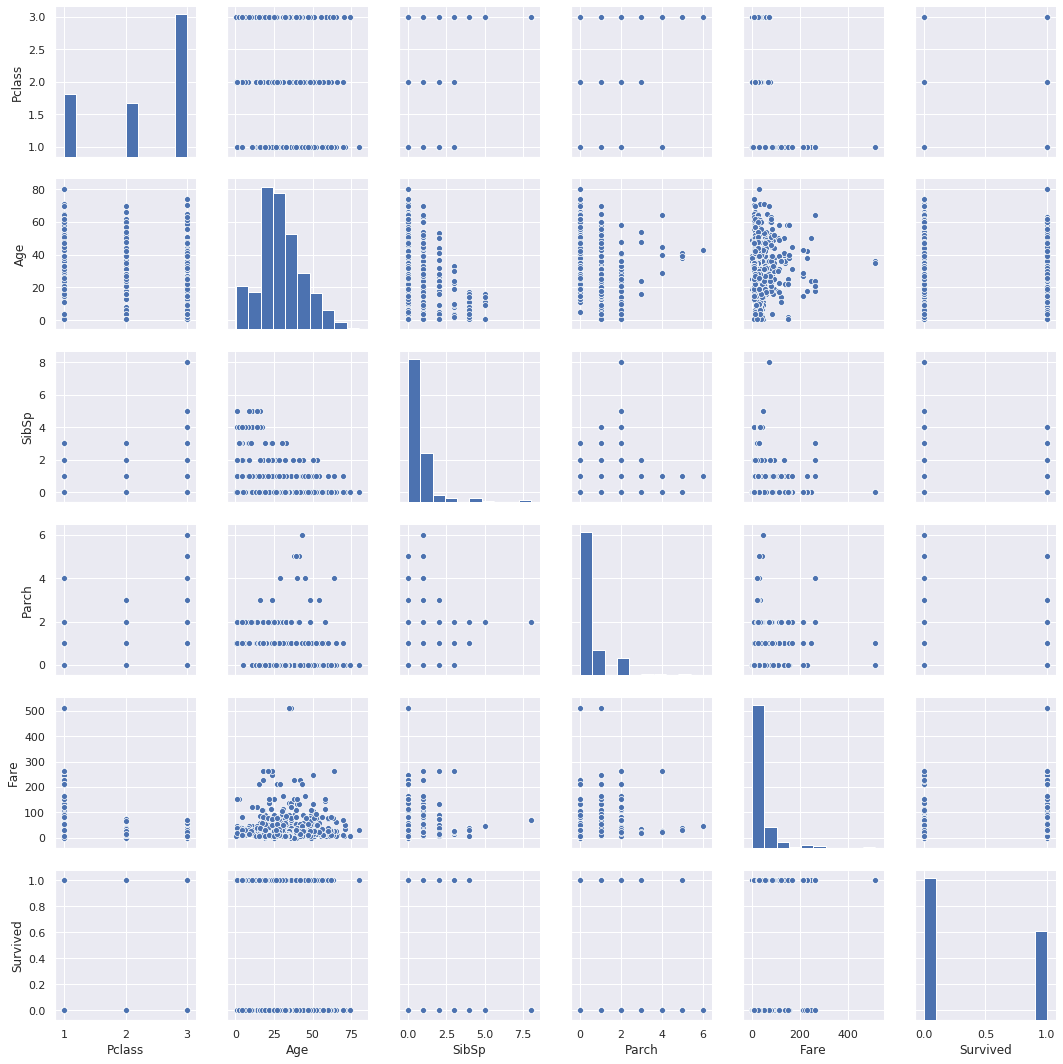

In [0]:
sns.pairplot(train[['Pclass','Age','SibSp','Parch','Fare','Survived']])

In [0]:
age_bins =[10,20,30,40,50,70,100]
train['age_group'] = pd.cut(train['Age'],age_bins)

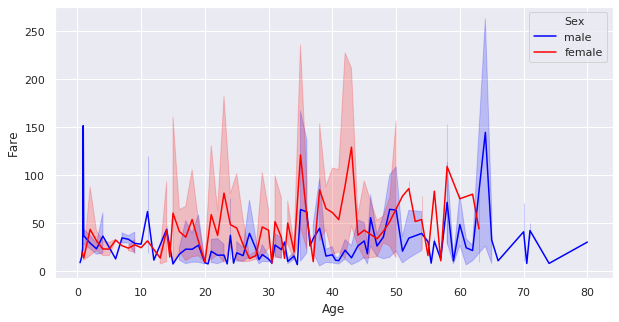

In [0]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Age", y="Fare", hue="Sex", data=train, palette={"male": "blue", "female": "red"})

In [0]:
# train['Fare_Age'] = train['Fare'].map(lambda x: 50 if x > 70 else 20)
# train['Fare_Age'].head()

In [0]:
# train['Age'] = train['Age'].fillna(train['Fare_Age'])
# train['Age'].head(10)

In [0]:
train['Age'] = train['Age'].fillna(train['Fare'].map(lambda x: 50 if x > 70 else 20))
train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    20.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64